In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
import plotly.express as px
import csv

In [2]:
#read in the data


DecWk3_Data = pd.read_csv('Picker_DecWk3_data.csv')

### NIGHT SHIFT ###

In [3]:
#Group by day of week and user name to find the earliest start time

earliest_start_time = DecWk3_Data.groupby(['Day_of_Week', 'user_name'])['First_Pick_Started'].min().reset_index()

table_view = earliest_start_time.pivot_table(index='user_name',columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')      

table_view = table_view.fillna(0)


In [4]:
print(table_view)

Day_of_Week         1         2         3         4         5         6
user_name                                                              
Troy                0   8:10 AM   8:06 AM   8:11 AM   8:06 AM   8:02 AM
ben          10:13 PM  10:12 PM  10:37 PM  10:14 PM  10:08 PM         0
damir               0         0   8:03 AM   1:12 PM   8:15 AM   8:42 AM
davidm       10:11 PM  10:11 PM  10:15 PM  10:11 PM  10:07 PM         0
gregory      10:08 PM  10:13 PM  10:12 PM  10:17 PM  10:11 PM         0
jackr               0         0         0         0   4:36 PM         0
justin        6:33 PM   5:47 PM   6:18 PM   6:35 PM   6:01 PM         0
kane                0   8:10 AM   8:10 AM   7:45 AM   8:12 AM   7:00 AM
lachlyn             0   8:42 AM         0   8:12 AM         0   9:09 AM
levi         10:08 PM   1:14 AM  10:06 PM  10:25 PM   9:08 PM         0
logan               0   1:22 AM  12:21 AM         0         0   3:04 AM
nateh               0   1:14 PM         0         0         0  1

In [5]:
Night_Shift = ['levi', 'ben', 'davidm', 'gregory', 'tim', 'steve','spiro']
desired_days = [1,2,3,4,5] 

In [6]:
filtered_data_Nights = DecWk3_Data[
    (DecWk3_Data['user_name'].isin(Night_Shift))&
    (DecWk3_Data['Day_of_Week'].isin(desired_days))]

In [10]:
table_view_Start = filtered_data_Nights.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1: 'Sun 17th', 2: 'Mon 18th', 3: 'Tues 19th', 4: 'Wed 20th', 5: 'Thurs 21st'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')

print(table_view_Start)

Days              Sun 17th  Mon 18th Tues 19th  Wed 20th Thurs 21st
Users Start Time                                                   
ben               10:13 PM  10:12 PM  10:37 PM  10:14 PM   10:08 PM
davidm            10:11 PM  10:11 PM  10:15 PM  10:11 PM   10:07 PM
gregory           10:08 PM  10:13 PM  10:12 PM  10:17 PM   10:11 PM
levi              10:08 PM   1:14 AM  10:06 PM  10:25 PM    9:08 PM
spiro             12:23 AM         0  12:09 AM  12:25 AM   12:16 AM
steve              8:08 PM   8:18 PM   8:10 PM   8:15 PM    8:09 PM
tim                2:36 AM         0         0  10:27 PM   10:36 PM


In [8]:
print(filtered_data_Nights[['user_name', 'Day_of_Week', 'First_Pick_Started', 'Last_Pick_Completed']])

   user_name  Day_of_Week First_Pick_Started Last_Pick_Completed
0        ben            1           10:13 PM             3:37 AM
1     davidm            1           10:11 PM             5:23 AM
2    gregory            1           10:08 PM             5:12 AM
4       levi            1           10:08 PM             3:37 AM
5      spiro            1           12:23 AM             4:12 AM
6      steve            1            8:08 PM             3:39 AM
7        tim            1            2:36 AM             3:35 AM
8        ben            2           10:12 PM             3:19 AM
9     davidm            2           10:11 PM             5:18 AM
10   gregory            2           10:13 PM             5:09 AM
14      levi            2            1:14 AM             3:01 AM
17     steve            2            8:18 PM             2:52 AM
19       ben            3           10:37 PM            10:49 PM
21    davidm            3           10:15 PM             4:05 AM
22   gregory            3

In [11]:
table_view_End = filtered_data_Nights.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1: 'Sun 17th', 2: 'Mon 18th', 3: 'Tues 19th', 4: 'Wed 20th', 5: 'Thurs 21st'})

# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')

print(table_view_End)

Days           Sun 17th Mon 18th Tues 19th Wed 20th Thurs 21st
Users End Time                                                
ben             3:37 AM  3:19 AM  10:49 PM  4:00 AM    5:56 AM
davidm          5:23 AM  5:18 AM   4:05 AM  4:06 AM    5:30 AM
gregory         5:12 AM  5:09 AM   3:37 AM  5:18 AM    3:19 AM
levi            3:37 AM  3:01 AM   2:51 AM  5:05 AM    6:01 AM
spiro           4:12 AM        0   2:47 AM  2:12 AM    3:44 AM
steve           3:39 AM  2:52 AM   2:52 AM  3:49 AM    3:41 AM
tim             3:35 AM        0         0  3:41 AM    4:30 AM


In [8]:
avg_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].mean()

print(avg_items_per_hour)

avg_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].mean()

print(avg_lines_per_hour)

avg_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].mean()

print(avg_hours_picking)

user_name
ben        119.900000
davidm      98.220000
gregory    112.000000
levi        92.140000
spiro      143.575000
steve      121.440000
tim         54.833333
Name: Items/hr(Shift), dtype: float64
user_name
ben        36.600
davidm     29.780
gregory    30.240
levi       22.080
spiro      33.475
steve      28.900
tim        19.600
Name: Lines/hr(Shift), dtype: float64
user_name
ben        2.3200
davidm     3.6760
gregory    5.3440
levi       3.7620
spiro      2.4025
steve      4.6200
tim        2.5800
Name: Hours_Picking, dtype: float64


In [9]:
min_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].min()

min_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].min()

min_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].min()

print(min_items_per_hour)
print(min_lines_per_hour)
print(min_hours_picking)


user_name
ben        110.3
davidm      81.2
gregory     93.8
levi        16.8
spiro      117.7
steve       96.8
tim         24.5
Name: Items/hr(Shift), dtype: float64
user_name
ben        32.1
davidm     22.8
gregory    22.3
levi        5.6
spiro      25.1
steve      23.9
tim        12.6
Name: Lines/hr(Shift), dtype: float64
user_name
ben        0.12
davidm     3.05
gregory    4.37
levi       0.63
spiro      1.52
steve      3.55
tim        0.77
Name: Hours_Picking, dtype: float64


In [10]:
max_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].max()

max_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].max()

max_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].max()

print(max_items_per_hour)
print(max_lines_per_hour)
print(max_hours_picking)


user_name
ben        138.0
davidm     129.3
gregory    135.7
levi       130.5
spiro      160.5
steve      144.5
tim         77.6
Name: Items/hr(Shift), dtype: float64
user_name
ben        43.1
davidm     35.7
gregory    37.4
levi       30.1
spiro      43.6
steve      33.2
tim        24.8
Name: Lines/hr(Shift), dtype: float64
user_name
ben        4.25
davidm     4.10
gregory    6.67
levi       5.48
spiro      3.23
steve      5.25
tim        3.60
Name: Hours_Picking, dtype: float64


In [11]:
Night_Stats = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking,
    'Min Items/Hr':min_items_per_hour,
    'Min Lines/Hr':min_lines_per_hour,
    'Min Hours Picking':min_hours_picking,
    'Max Items/Hr':max_items_per_hour,
    'Max Lines/Hr':max_lines_per_hour,
    'Max Hours Picking':max_hours_picking
}

df_night_stats = pd.DataFrame(Night_Stats)
# Specify the file path where you want to save the CSV file
file_path_Night_Stats = 'Night_Stats_Wk3.csv'

# Export the DataFrame to a CSV file
df_night_stats.to_csv(file_path_Night_Stats)

<Figure size 1000x600 with 0 Axes>

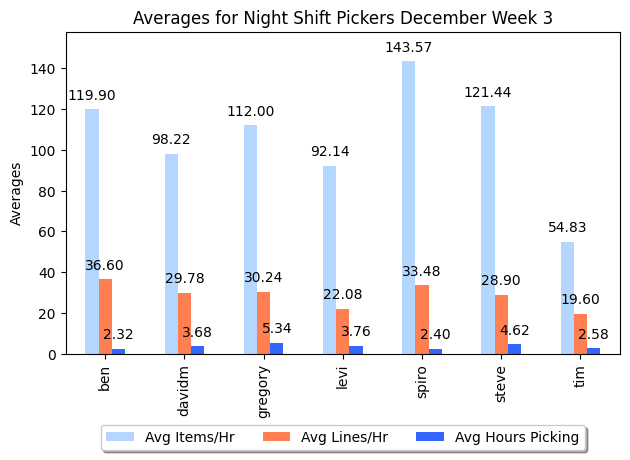

<Figure size 1000x600 with 0 Axes>

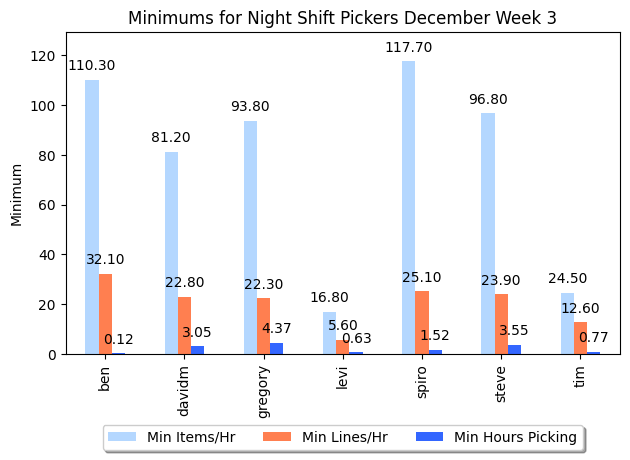

<Figure size 1000x600 with 0 Axes>

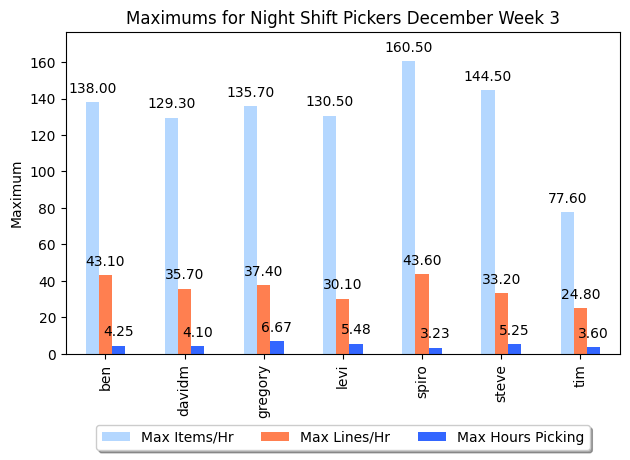

In [13]:
#create a dataframe with the averages 

data_averages = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking
}

# Creating a DataFrame from the calculated averages
df = pd.DataFrame(data_averages)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Night Shift Pickers December Week 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



#create a dataframe with the minimum

data_minimum = {
    'Min Items/Hr': min_items_per_hour,
    'Min Lines/Hr': min_lines_per_hour,
    'Min Hours Picking': min_hours_picking
}

# Creating a DataFrame from the calculated averages
df_min = pd.DataFrame(data_minimum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Night Shift Pickers December Week 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum = {
    'Max Items/Hr': max_items_per_hour,
    'Max Lines/Hr': max_lines_per_hour,
    'Max Hours Picking': max_hours_picking
}

# Creating a DataFrame from the calculated averages
df_max= pd.DataFrame(data_maximum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Night Shift Pickers December Week 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



In [35]:
# Specify the file path where you want to save the CSV file
file_path_averages = 'NSdata_averagesWk3.csv'

# Export the DataFrame to a CSV file
df.to_csv(file_path_averages)

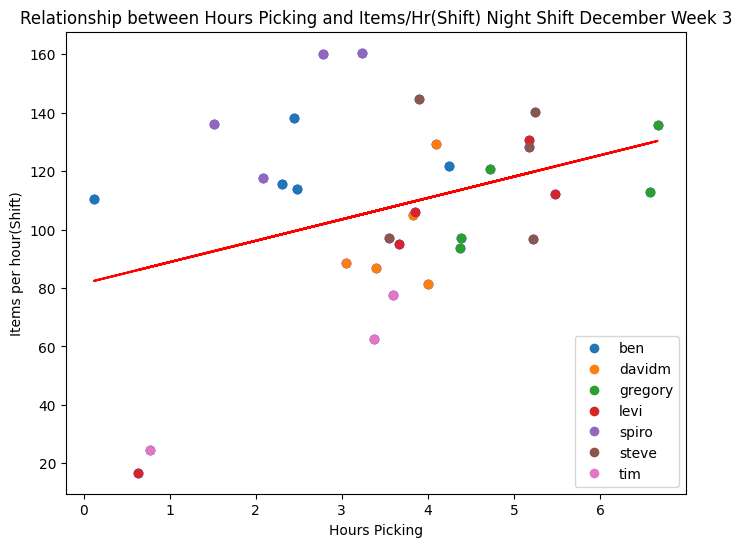

In [15]:
user_names = filtered_data_Nights['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Nights['Hours_Picking'], filtered_data_Nights['Items/hr(Shift)'], color='blue')

x = filtered_data_Nights['Hours_Picking']
y = filtered_data_Nights['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data_Nights[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='lower right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) Night Shift December Week 3')
plt.show()

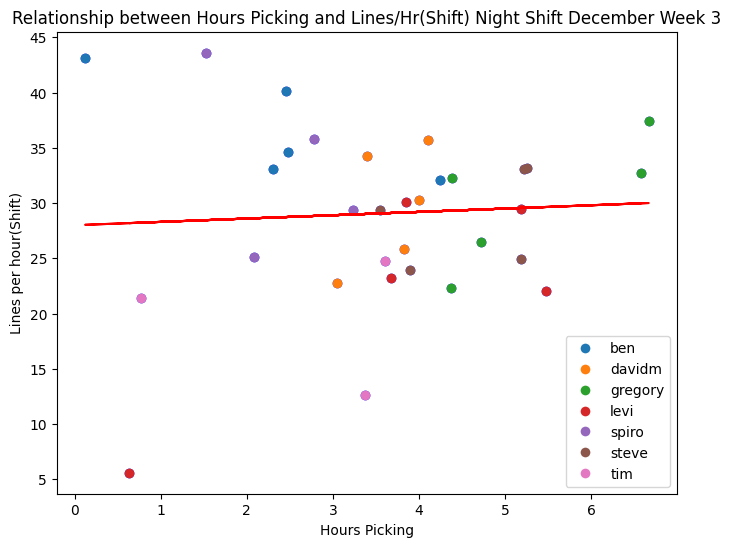

In [42]:
user_names = filtered_data_Nights['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Nights['Hours_Picking'], filtered_data_Nights['Lines/hr(Shift)'], color='blue')

#calculate trend line

x = filtered_data_Nights['Hours_Picking']
y = filtered_data_Nights['Lines/hr(Shift)']
m, b = np.polyfit(x,y,1)


plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data_Nights[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Lines/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='lower right')


plt.xlabel('Hours Picking')
plt.ylabel('Lines per hour(Shift)')
plt.title('Relationship between Hours Picking and Lines/Hr(Shift) Night Shift December Week 3')
plt.show()

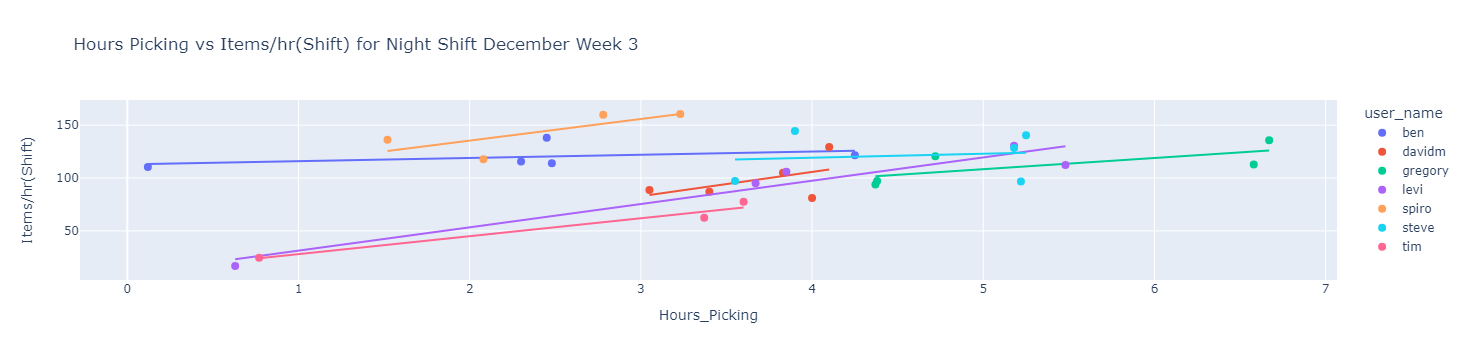

In [45]:

fig = px.scatter(filtered_data_Nights, x='Hours_Picking', y='Items/hr(Shift)', color='user_name',trendline='ols',
                 title='Hours Picking vs Items/hr(Shift) for Night Shift December Week 3')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

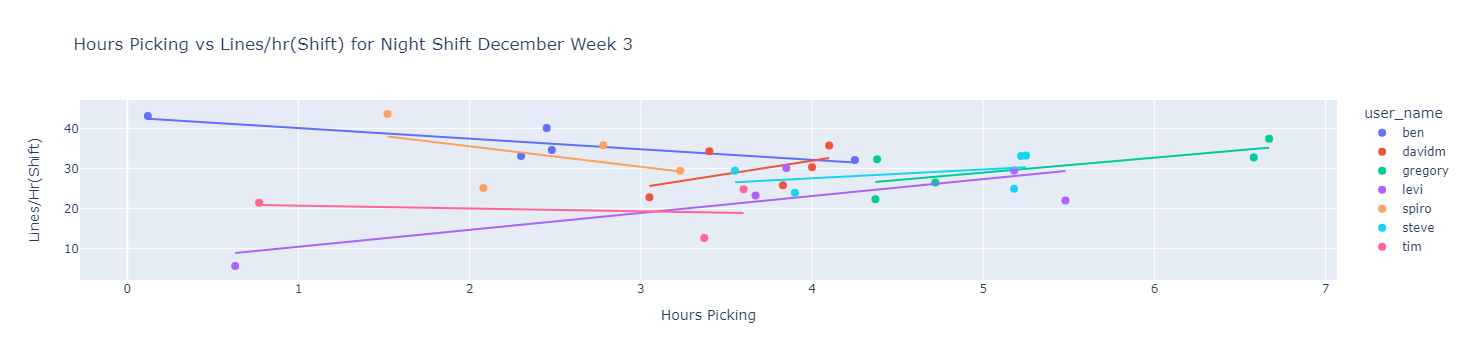

In [47]:
fig = px.scatter(filtered_data_Nights, x='Hours_Picking', y='Lines/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Lines/hr(Shift)' : 'Lines/Hr(Shift)'},
                 title='Hours Picking vs Lines/hr(Shift) for Night Shift December Week 3')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

/tmp/ipykernel_788/4266023584.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)


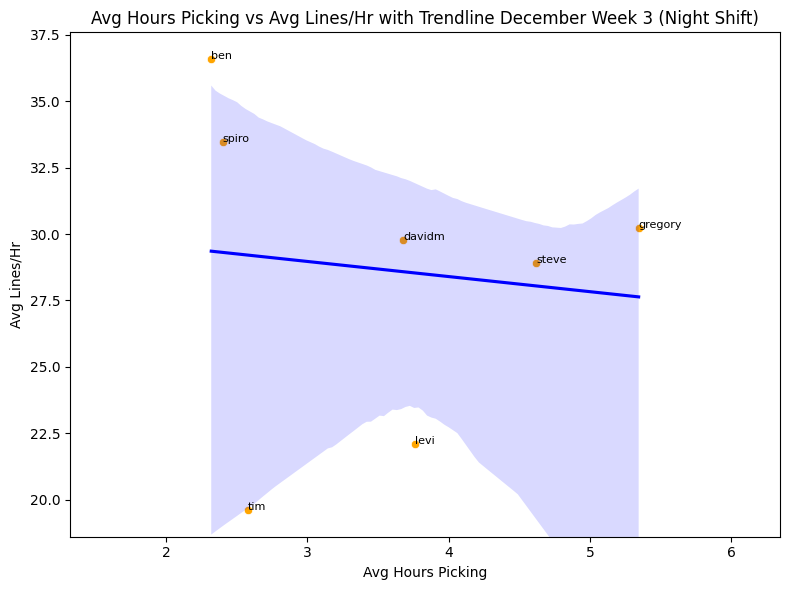

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Lines/Hr'].min() - 1, df_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 3 (Night Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_945/1412379992.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



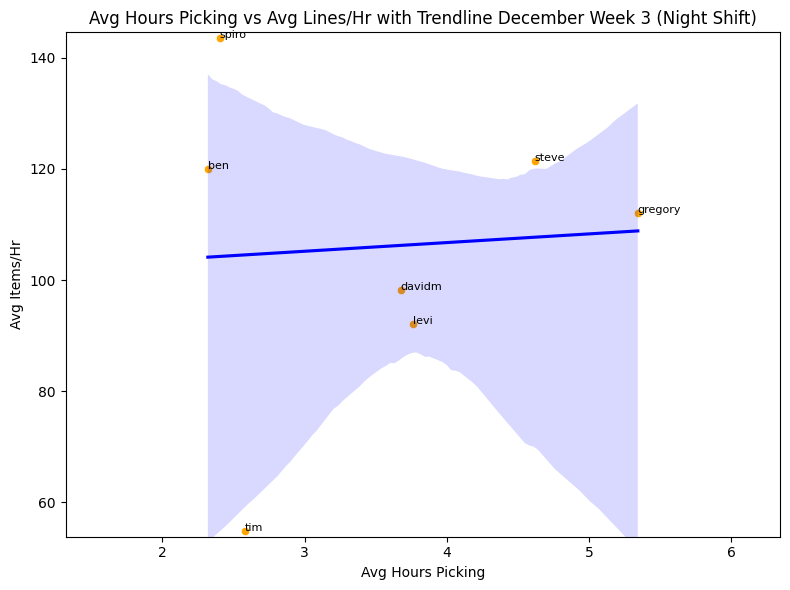

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Items/Hr'].min() - 1, df_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 3 (Night Shift)')
plt.tight_layout()
plt.show()


### DAY SHIFT ###

In [12]:
Day_shift = ['Troy', 'damir', 'jessek','justin','kane', 'lachlyn','owenl','simonb']
desired_days = [1,2,3,4,5,6]

In [13]:
filtered_data_Day = DecWk3_Data[
    (DecWk3_Data['user_name'].isin(Day_shift))&
    (DecWk3_Data['Day_of_Week'].isin(desired_days))]

In [15]:
table_view_Start = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1: 'Sun 17th', 2: 'Mon 18th', 3: 'Tues 19th', 4: 'Wed 20th', 5: 'Thurs 21st', 6: 'Fri 22nd'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')

print(table_view_Start)

table_view_End = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1: 'Sun 17th', 2: 'Mon 18th', 3: 'Tues 19th', 4: 'Wed 20th', 5: 'Thurs 21st', 6: 'Fri 22nd'})


# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')

print(table_view_End)

Days             Sun 17th Mon 18th Tues 19th Wed 20th Thurs 21st Fri 22nd
Users Start Time                                                         
Troy                    0  8:10 AM   8:06 AM  8:11 AM    8:06 AM  8:02 AM
damir                   0        0   8:03 AM  1:12 PM    8:15 AM  8:42 AM
justin            6:33 PM  5:47 PM   6:18 PM  6:35 PM    6:01 PM        0
kane                    0  8:10 AM   8:10 AM  7:45 AM    8:12 AM  7:00 AM
lachlyn                 0  8:42 AM         0  8:12 AM          0  9:09 AM
owenl                   0        0         0        0    8:10 AM        0
Days           Sun 17th Mon 18th Tues 19th Wed 20th Thurs 21st Fri 22nd
Users End Time                                                         
Troy                  0  3:38 PM   3:53 PM  3:43 PM    4:12 PM  3:33 PM
damir                 0        0   2:37 PM  3:51 PM   11:30 AM  2:33 PM
justin          2:07 AM  1:32 AM   1:18 AM  1:39 AM    2:53 AM        0
kane                  0  1:14 PM   1:32 PM  2:46

In [61]:
avg_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].mean()
avg_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].mean()
avg_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].mean()

#print(avg_items_per_hour_day)
#print(avg_lines_per_hour_day)
#print(avg_hours_picking_day)


min_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].min()
min_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].min()
min_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].min()

#print(min_items_per_hour_day)
#print(min_lines_per_hour_day)
#print(min_hours_picking_day)

max_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].max()
max_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].max()
max_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].max()

#print(max_items_per_hour_day)
#print(max_lines_per_hour_day)
#print(max_hours_picking_day)


In [62]:
Day_Stats = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day,
    'Min Items/Hr':min_items_per_hour_day,
    'Min Lines/Hr':min_lines_per_hour_day,
    'Min Hours Picking':min_hours_picking_day,
    'Max Items/Hr':max_items_per_hour_day,
    'Max Lines/Hr':max_lines_per_hour_day,
    'Max Hours Picking':max_hours_picking_day
}

df_day_stats = pd.DataFrame(Day_Stats)
# Specify the file path where you want to save the CSV file
file_path_Day_Stats = 'Day_Stats_Wk3.csv'

# Export the DataFrame to a CSV file
df_day_stats.to_csv(file_path_Day_Stats)

<Figure size 1000x600 with 0 Axes>

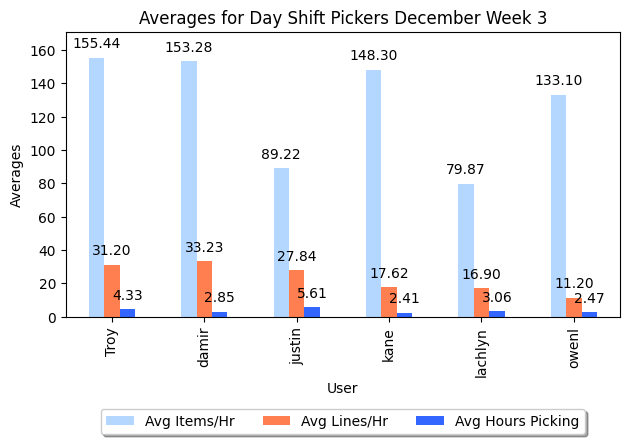

<Figure size 1000x600 with 0 Axes>

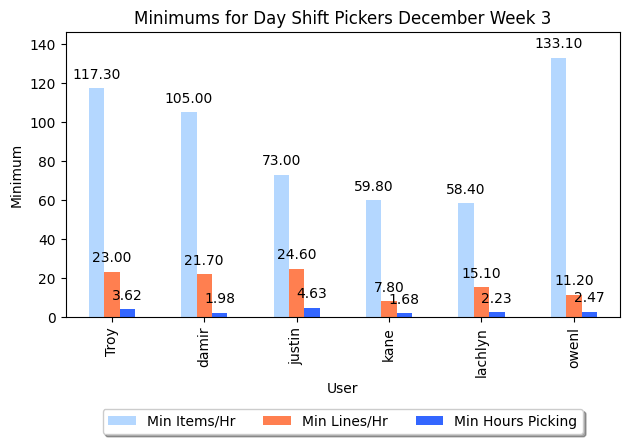

<Figure size 1000x600 with 0 Axes>

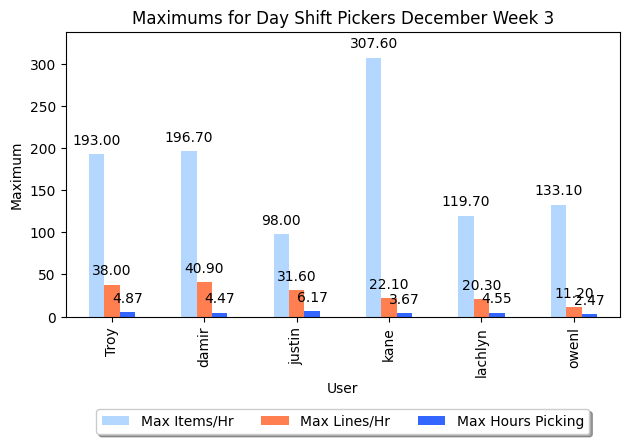

In [78]:
#create a dataframe with the averages 

data_averages_day = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_day = pd.DataFrame(data_averages_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Day Shift Pickers December Week 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the minimum

data_minimum_day = {
    'Min Items/Hr': min_items_per_hour_day,
    'Min Lines/Hr': min_lines_per_hour_day,
    'Min Hours Picking': min_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_min_day = pd.DataFrame(data_minimum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Day Shift Pickers December Week 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum_day = {
    'Max Items/Hr': max_items_per_hour_day,
    'Max Lines/Hr': max_lines_per_hour_day,
    'Max Hours Picking': max_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_max_day= pd.DataFrame(data_maximum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Day Shift Pickers December Week 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()

In [64]:
# Specify the file path where you want to save the CSV file
file_path_averages_day = 'DSdata_averagesWk3.csv'

# Export the DataFrame to a CSV file
df_day.to_csv(file_path_averages_day)

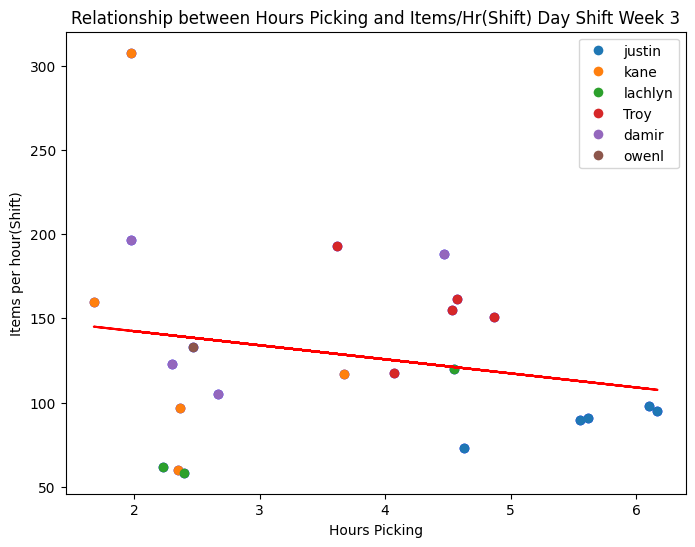

In [71]:
user_names_day = filtered_data_Day['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Day['Hours_Picking'], filtered_data_Day['Items/hr(Shift)'], color='blue')

x = filtered_data_Day['Hours_Picking']
y = filtered_data_Day['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users_day = user_names_day.unique()
user_lines_day = {}


for user in unique_users_day:
    user_data_day = filtered_data_Day[user_names_day == user]
    plt.scatter(user_data_day['Hours_Picking'], user_data_day['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users_day)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) Day Shift Week 3')
plt.show()

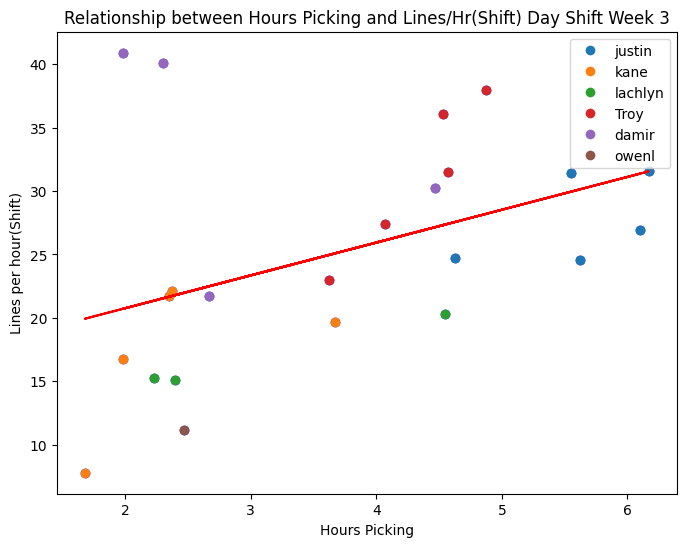

In [72]:
user_names_day = filtered_data_Day['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Day['Hours_Picking'], filtered_data_Day['Lines/hr(Shift)'], color='blue')

x = filtered_data_Day['Hours_Picking']
y = filtered_data_Day['Lines/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users_day = user_names_day.unique()
user_lines_day = {}


for user in unique_users_day:
    user_data_day = filtered_data_Day[user_names_day == user]
    plt.scatter(user_data_day['Hours_Picking'], user_data_day['Lines/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users_day)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Lines per hour(Shift)')
plt.title('Relationship between Hours Picking and Lines/Hr(Shift) Day Shift Week 3')
plt.show()

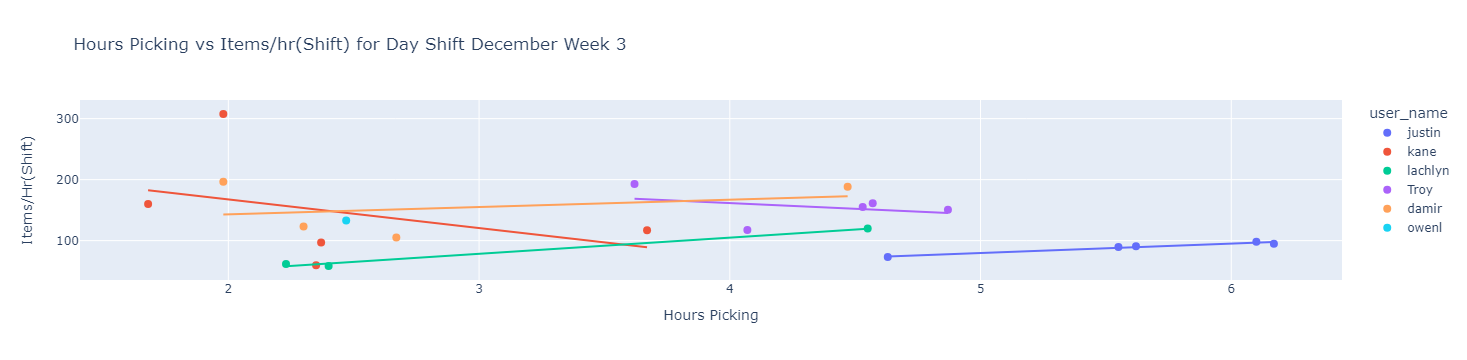

In [73]:
fig = px.scatter(filtered_data_Day, x='Hours_Picking', y='Items/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Items/hr(Shift)' : 'Items/Hr(Shift)'},
                 title='Hours Picking vs Items/hr(Shift) for Day Shift December Week 3')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

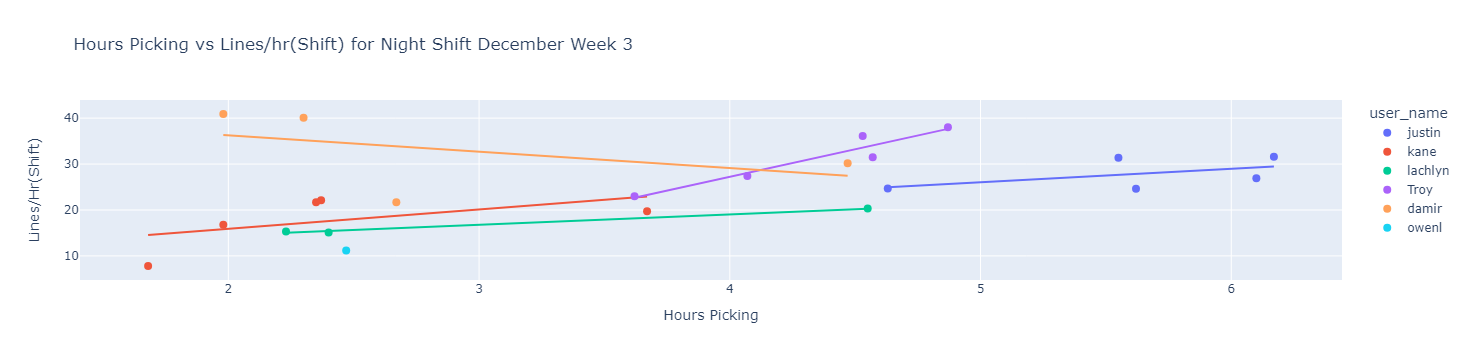

In [74]:
fig = px.scatter(filtered_data_Day, x='Hours_Picking', y='Lines/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Lines/hr(Shift)' : 'Lines/Hr(Shift)'},
                 title='Hours Picking vs Lines/hr(Shift) for Night Shift December Week 3')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

/tmp/ipykernel_945/2789345663.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



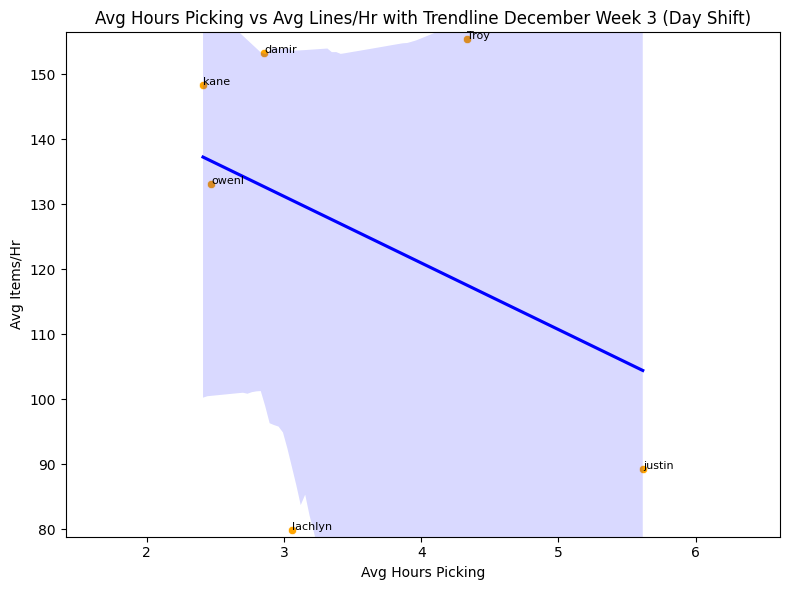

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Items/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Items/Hr'].min() - 1, df_day_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 3 (Day Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_945/2520728633.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



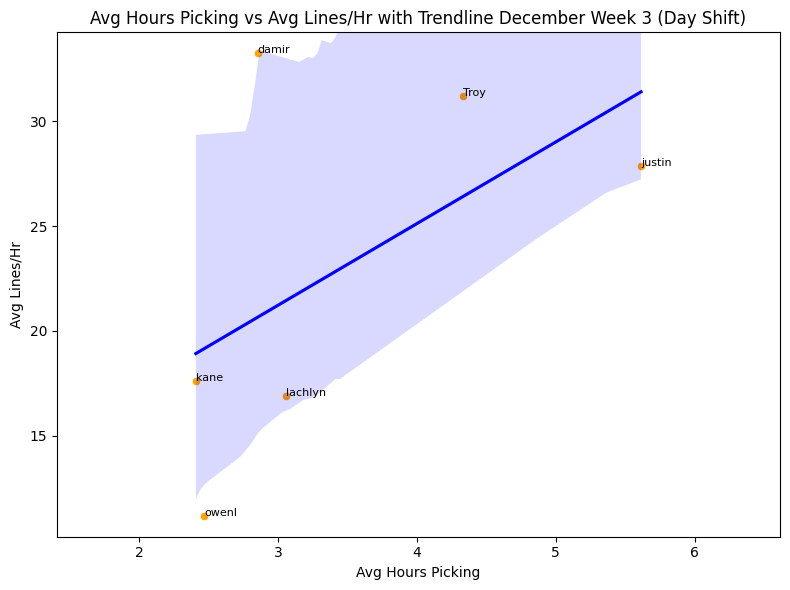

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Lines/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Lines/Hr'].min() - 1, df_day_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 3 (Day Shift)')
plt.tight_layout()
plt.show()
